I am Gonna follow the steps given on the Tensorflow Image classfication, to learn how to build a model to use for image classifications

  link for documentation : https://www.tensorflow.org/tutorials/images/classification

In [ ]:
#first we should import he necessary libries:

import matplotlib.pyplot as plt
import numpy as np
import PIL #python imaging library ; called as pillow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True) #download data set and extract
data_dir = pathlib.Path(data_dir).with_suffix('') # this used to modify the path, and it remove the suffic .tar and point to the directory containgin the extracted flower photos



228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


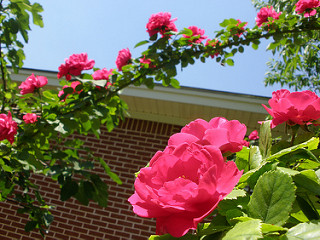

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

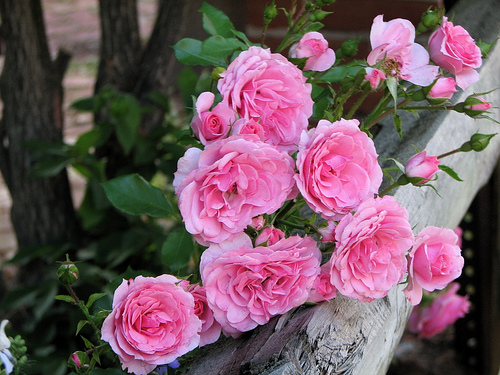

In [ ]:
PIL.Image.open(str(roses[1]))

In [ ]:
print(len(list(data_dir.glob('roses/*'))))

641


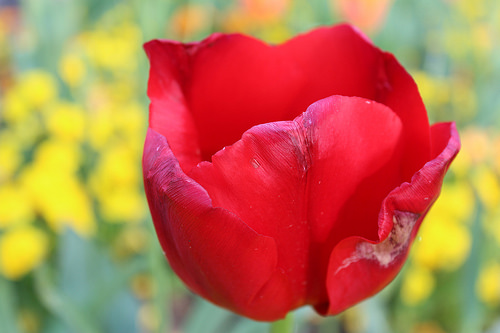

In [ ]:
#doe tulips
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
print(len(list(data_dir.glob('tulips/*'))))

799


Now Gonna load data using Keras utility.
tf.keras.utils.image_dataset_from_directory

to lear to write your own data loading code from scratch by visiting : https://www.tensorflow.org/tutorials/load_data/images


In [ ]:
#define param

batch_size = 32
img_height = 180
img_width = 180

In [ ]:
#train data 80%

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
#val data 20%

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_height),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
train_ds.element_spec

(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

Lets see how we can visuallize the data, usign matplotlib

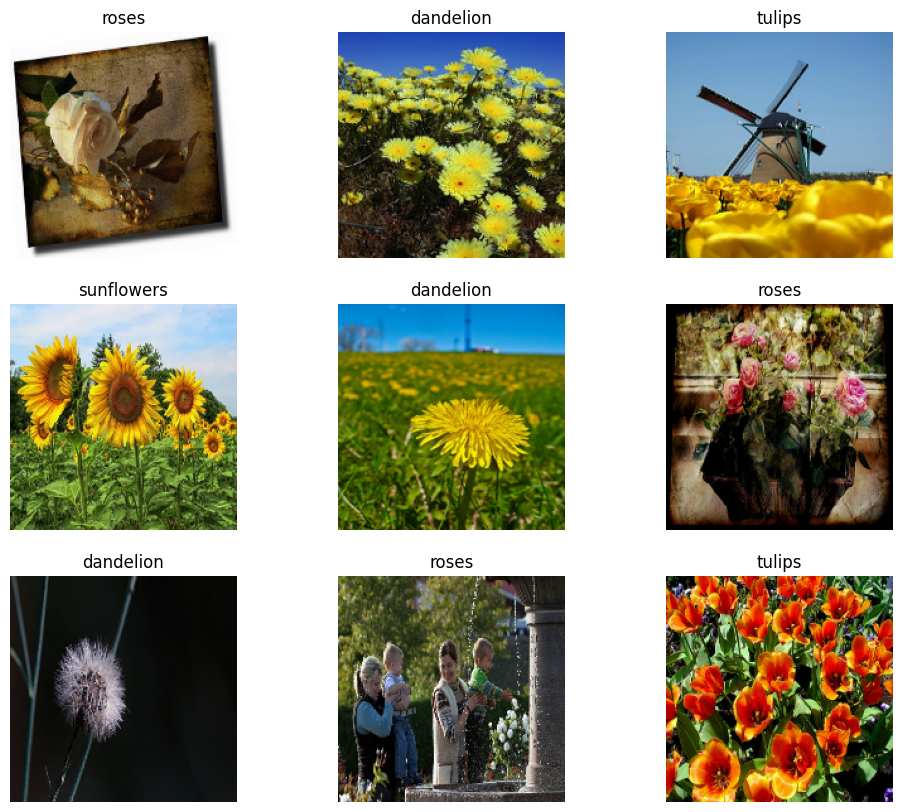

In [ ]:
plt.figure(figsize=(12,10))

for images, lables in train_ds.take(1): #take a one batch and assign images and their lables to image and lable
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)  #create 3*3 grid and acces them by i+1 iretator
    plt.imshow(images[i].numpy().astype("uint8"))  #convert image tensor into numpy array, then mathplotlib can understand & uint8 ensure it in correct format (unsigned 8-bit integer)
    plt.title(class_names[lables[i]]) #acces the ith lable of the batch
    plt.axis("off")

In [ ]:
for image_batch, lables_batch in train_ds:
  print(image_batch.shape)
  print(lables_batch.shape)


(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3

Last batch size is 24, this is give us a signal, how the batch behave is..

Lets, Use the buffered prefetching: ⛳

simply,here we gonna load the next batch while the current batch is training, whithout having I/O become blocking. (waiting CPU or GPU after processing on a one batch, untile next batch is loading)

2ways to do this
1.   Dataset.cache
2.   Dataset.prefetch

U should read this article after completing this project.
https://www.tensorflow.org/guide/data_performance




In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds.cache().prefetch(buffer_size = AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, lables_batch = next(iter(normalized_ds))


first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 0.96902645


In [ ]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./225, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Model compiling

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#lets train the model

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.3488 - loss: 1.7064 - val_accuracy: 0.5409 - val_loss: 1.1151
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5871 - loss: 1.0387 - val_accuracy: 0.5940 - val_loss: 1.0352
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6918 - loss: 0.8239 - val_accuracy: 0.6390 - val_loss: 0.9165
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8031 - loss: 0.5666 - val_accuracy: 0.6213 - val_loss: 0.9912
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8844 - loss: 0.3627 - val_accuracy: 0.6349 - val_loss: 1.0953
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9304 - loss: 0.2339 - val_accuracy: 0.5995 - val_loss: 1.3149
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9666 - loss: 0.1162 - val_accuracy: 0.5940 - val_loss: 1.7534
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9721 - loss: 0.1296 - val_accuracy: 0.6281 -

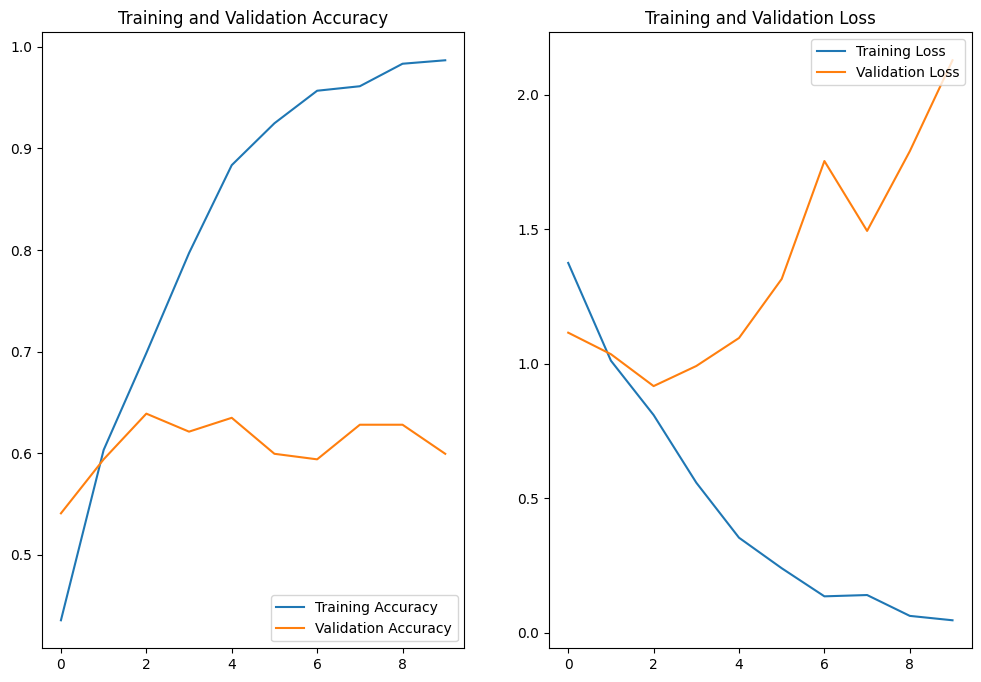

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As the above graphs show, this model has overiting on the test data set.
to minimize this overfiting we can use,


*   Data augmentation
*   Droput




In [ ]:
#Data augmentation
#to increase the number of training data, by zooming, rotating and fliping existing data

data_augmentation = keras.Sequential(
    [layers.RandomFlip('horizontal',
                       input_shape=(img_height, img_height, 3)),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.1),]
)

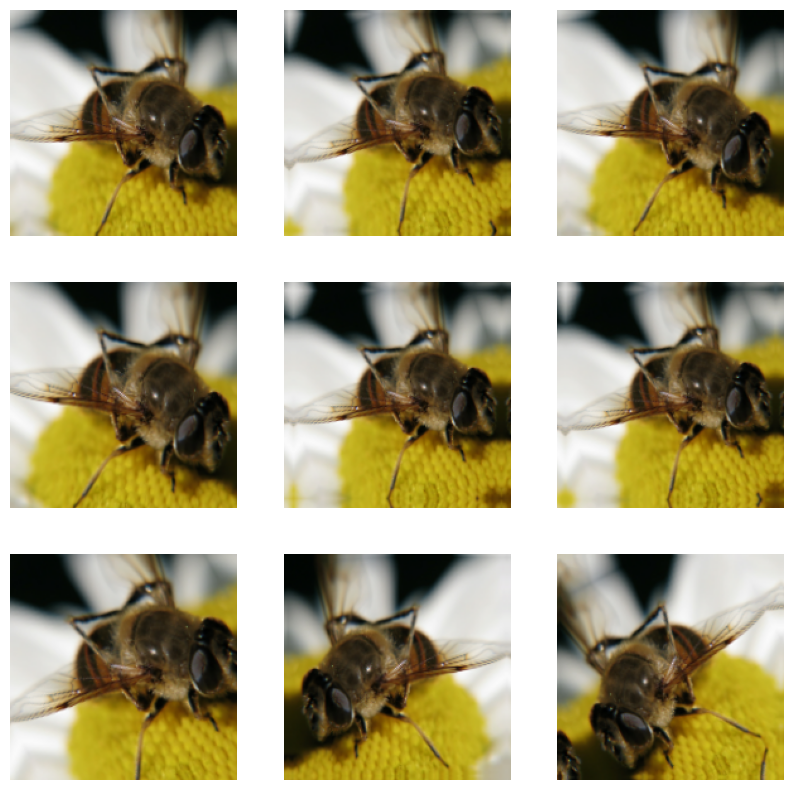

In [ ]:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1): #take 32 images (one batch)
  for i in range(9):
    augmented_images = data_augmentation(images) #rotate, flip zoom images using augmentation layer
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))  #plot the same images 0th of the data batch instead of using i to print different images after augmented
    plt.axis("off")

**Droputs**

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process.

In [ ]:
#lets create the model including dropouts

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./225),
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputs (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 15
history = model.fit(
    train_ds,
    validation_data= val_ds,
    epochs=epochs
)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.3098 - loss: 1.6645 - val_accuracy: 0.5777 - val_loss: 1.1006
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.5506 - loss: 1.0954 - val_accuracy: 0.5954 - val_loss: 1.0368
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.6256 - loss: 0.9672 - val_accuracy: 0.6349 - val_loss: 0.9264
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.6889 - loss: 0.8481 - val_accuracy: 0.6540 - val_loss: 0.8937
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6792 - loss: 0.8320 - val_accuracy: 0.6798 - val_loss: 0.8417
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6937 - loss: 0.7912 - val_accuracy: 0.6989 - val_loss: 0.7818
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7193 - loss: 0.7307 - val_accuracy: 0.6757 - val_loss: 0.8216
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7289 - loss: 0.6950 - val_accuracy: 0.6962 - v

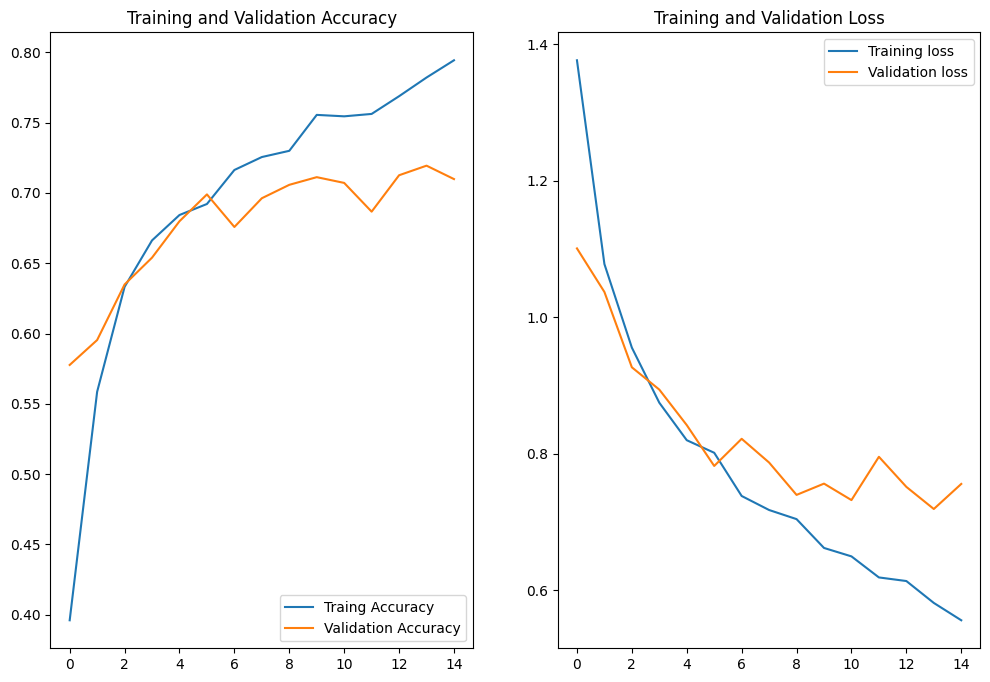

In [ ]:
#lets plot the Results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Traing Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

See we have got a model with less overfitting compared to the previous model

In [ ]:
## Lets Predic using this model

sunflower_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg'
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) #here we are creating the batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image is mostly liked to be {} with a {} % confidence."
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

117948/117948 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
This image is mostly liked to be sunflowers with a 63.97095322608948 % confidence.


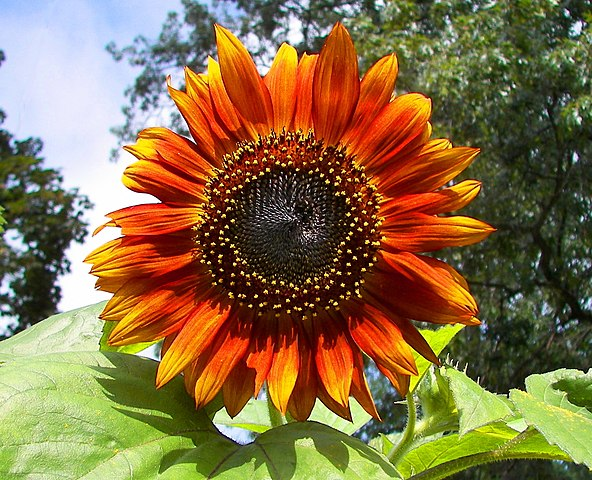

In [ ]:
PIL.Image.open(sunflower_path)

In [ ]:
tulip_path = '/tulip1.jpeg'

img = tf.keras.utils.load_img(
    tulip_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) #here we are creating the batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image is mostly liked to be {} with a {} % confidence."
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
This image is mostly liked to be roses with a 52.16519236564636 % confidence.


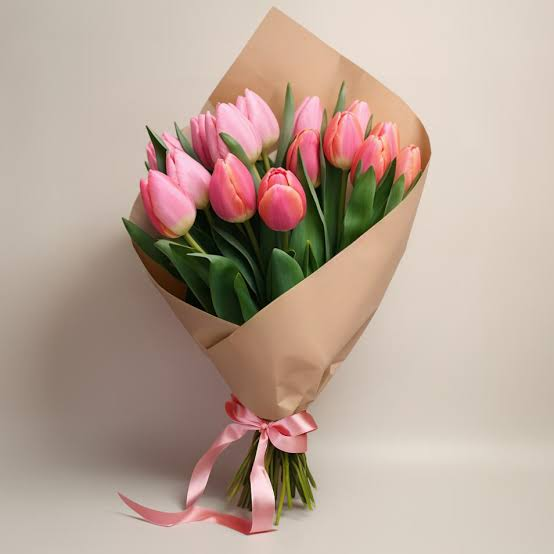

In [ ]:
PIL.Image.open(tulip_path)

In [ ]:
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
flower_path = '/daisy.jpeg'

img = tf.keras.utils.load_img(
    tulip_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) #here we are creating the batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image is mostly liked to be {} with a {} % confidence."
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

img = tf.keras.utils.load_img(
    flower_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) #here we are creating the batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image is mostly liked to be {} with a {} % confidence."
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
This image is mostly liked to be roses with a 52.16519236564636 % confidence.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
This image is mostly liked to be daisy with a 99.52660799026489 % confidence.


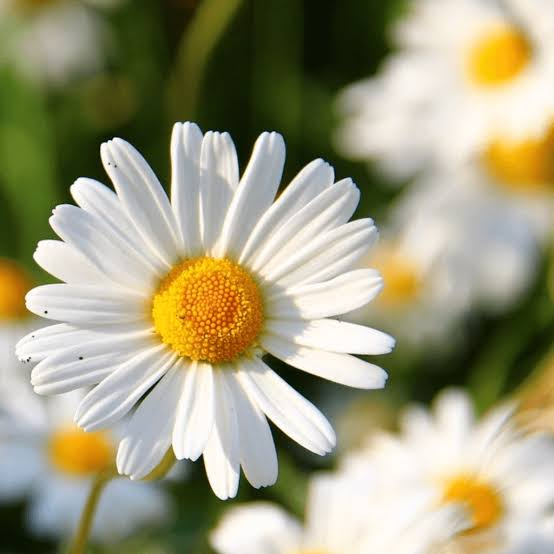

In [ ]:
PIL.Image.open(flower_path)